# Plots of the Live Data

Author: Zora Nolte

Last updated: 12.02.2022

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from parameters_preprocessing import *
import random
import re
from scipy import stats
import seaborn as sns

# Plot duration of each area (per condition and mode)

In [2]:
search_path = os.getcwd() + '\\data\\' # location of the data files

# get overview filenames
overview_avatar_fp = [x for x in os.listdir(path=search_path) if re.match("\d+_AvatarFirstperson_\d+.json", x)]
overview_avatar_h = [x for x in os.listdir(path=search_path) if re.match("\d+_AvatarHybrid_\d+.json", x)]
overview_blob_fp = [x for x in os.listdir(path=search_path) if re.match("\d+_BlobFirstperson_\d+.json", x)]
overview_blob_h = [x for x in os.listdir(path=search_path) if re.match("\d+_BlobHybrid_\d+.json", x)]

In [3]:
# create dicitionaries containing the parkour duration of each area
avatar_fp = {"0" : [], "1" : [], "2" : [], "3" : [], "4" : []}
avatar_h = {"0" : [], "1" : [], "2" : [], "3" : [], "4" : []}
blob_fp = {"0" : [], "1" : [], "2" : [], "3" : [], "4" : []}
blob_h = {"0" : [], "1" : [], "2" : [], "3" : [], "4" : []}

def getDuration(fnames, datadict):
    for fname in fnames:
        data = json.load(open(search_path + fname))
        for station in data['_stationDataFrames']:
            if station["stationID"] != '':
                datadict[station["stationID"]].append(station['PakourDuration'])
                
getDuration(overview_avatar_fp, avatar_fp)
getDuration(overview_avatar_h, avatar_h)
getDuration(overview_blob_fp, blob_fp)
getDuration(overview_blob_h, blob_h)

In [18]:
def swarmBoxDuration(fp, hybrid, condition):
    '''
    fp (dict): dictionary containing the parkour duration per first person area (fp["area"])
    hybrid (dict): dictionary containing the x and z coordinates per hybrid area (hybrid["area"])
    condition (str): condition name to be put in the figure title
    subjects (list of str): list of the plotted subjects' ids
    '''
    
    colors = ["#b30000", "#4421af", "#00b7c7", "#8be04e", "#ffa300"]
    
    sns.set_style("white")

    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(5,20), sharey='row')
    fig.suptitle("Parkour Duration: " + condition + " Condition", fontweight='bold', fontsize=18, y=0.93)  
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    ax = ax.ravel()
    '''
    OLD CODE FOR 2 ROWS with 5 COLUMNS
    for i, j in zip(range(0, 5), range(5,10)):
        ax[i] = sns.boxplot(data = fp[str(i)], ax = ax[i], color = colors[i],
                           showcaps=False,boxprops={'facecolor':'None'},
                            showfliers=False,whiskerprops={'linewidth':0})
        ax[i] = sns.swarmplot(data = fp[str(i)], ax = ax[i], color = colors[i], edgecolor="black", linewidth=1, s=8)        
        ax[i].set_title("First Person Area " + str(i), fontsize=14, pad=15)
        ax[i].set_xticks([])

        #ax[j] = sns.boxplot(data = hybrid[str(i)], ax = ax[j], color = colors[i])
        #ax[j] = sns.swarmplot(data = hybrid[str(i)], ax = ax[j], color = "0.2", s=8)    
        ax[j] = sns.boxplot(data = hybrid[str(i)], ax = ax[j], color = colors[i],
                           showcaps=False,boxprops={'facecolor':'None'},
                            showfliers=False,whiskerprops={'linewidth':0})
        ax[j] = sns.swarmplot(data = hybrid[str(i)], ax = ax[j], color = colors[i], edgecolor="black", linewidth=1, s=8)
        ax[j].set_title("Hybrid Area " + str(i), fontsize=14, pad=15)
        ax[j].set_xticks([])
    '''

    for i, j in zip(range(0, 10, 2), range(0,5)):
        ax[i] = sns.boxplot(data = fp[str(j)],
                            ax = ax[i],
                            color = colors[j],
                            showcaps=False,boxprops={'facecolor':'None'},
                            showfliers=False,whiskerprops={'linewidth':0},
                            medianprops=dict(color=colors[j], alpha=0.8))
        ax[i] = sns.swarmplot(data = fp[str(j)], ax = ax[i], color = colors[j], edgecolor="black", linewidth=1)#, s=8)        
        ax[i].set_title("First Person Area " + str(j), fontsize=14, pad=18, fontweight='bold')
        ax[i].set_xticks([])
        ax[i].set_ylabel("Duration in s", fontsize=14)

        #ax[j] = sns.boxplot(data = hybrid[str(i)], ax = ax[j], color = colors[i])
        #ax[j] = sns.swarmplot(data = hybrid[str(i)], ax = ax[j], color = "0.2", s=8)    
        ax[i+1] = sns.boxplot(data = hybrid[str(j)], ax = ax[i+1], color = colors[j],
                              showcaps=False,boxprops={'facecolor':'None'},
                              showfliers=False,whiskerprops={'linewidth':0},
                              medianprops=dict(color=colors[j], alpha=0.8))
        ax[i+1] = sns.swarmplot(data = hybrid[str(j)], ax = ax[i+1], color = colors[j], edgecolor="black", linewidth=1)#, s=8)
        ax[i+1].set_title("Hybrid Area " + str(j), fontsize=14, pad=18, fontweight='bold')
        ax[i+1].set_xticks([])

    sns.despine()

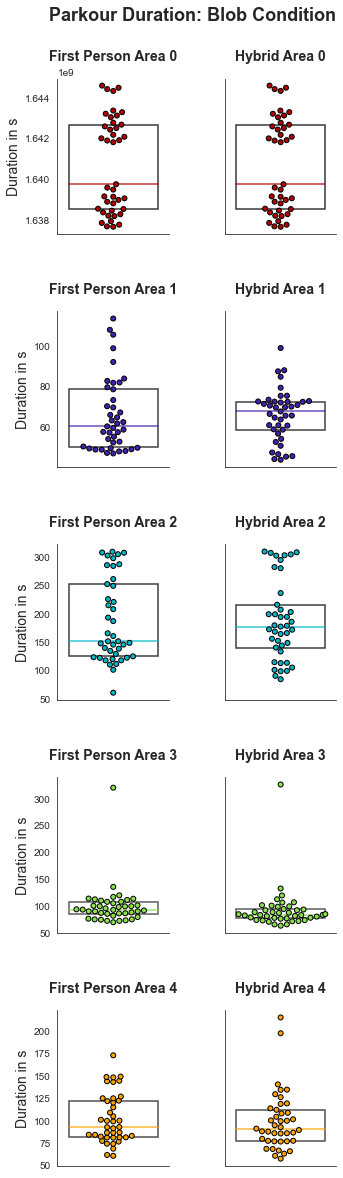

In [19]:
swarmBoxDuration(blob_fp, blob_h, "Blob")

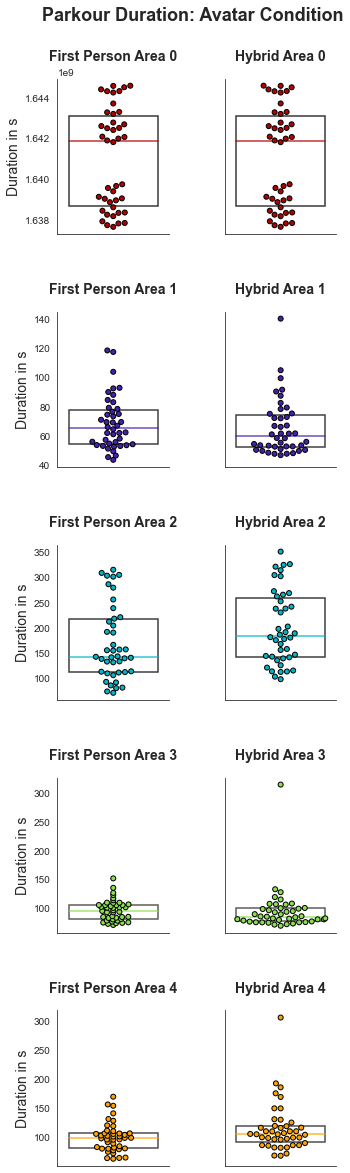

In [20]:
swarmBoxDuration(avatar_fp, avatar_h, "Avatar")

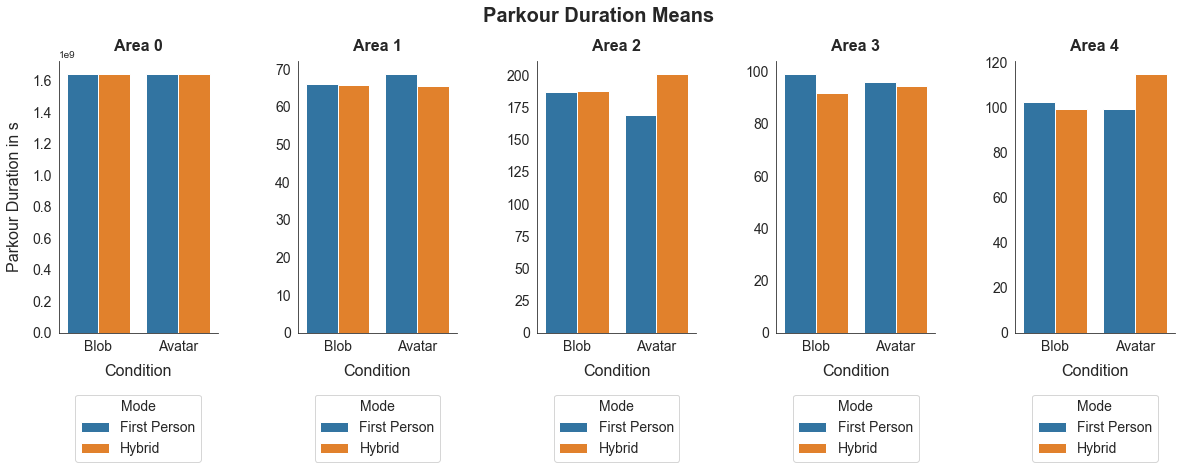

In [7]:
# grouped bar plot of the parkour durations

sns.set_style("white")

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
fig.suptitle("Parkour Duration Means", fontweight='bold', fontsize=20, y=1.03)  
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.ravel()

meandata = pd.DataFrame({"Condition": ["Blob", "Blob", "Avatar", "Avatar"],
                         "Mode": ["First Person", "Hybrid", "First Person", "Hybrid"],
                         "0": [np.mean(blob_fp["0"]), np.mean(blob_h["0"]), np.mean(avatar_fp["0"]), np.mean(avatar_h["0"])],
                         "1": [np.mean(blob_fp["1"]), np.mean(blob_h["1"]), np.mean(avatar_fp["1"]), np.mean(avatar_h["1"])],
                        "2": [np.mean(blob_fp["2"]), np.mean(blob_h["2"]), np.mean(avatar_fp["2"]), np.mean(avatar_h["2"])],
                        "3": [np.mean(blob_fp["3"]), np.mean(blob_h["3"]), np.mean(avatar_fp["3"]), np.mean(avatar_h["3"])],
                        "4": [np.mean(blob_fp["4"]), np.mean(blob_h["4"]), np.mean(avatar_fp["4"]), np.mean(avatar_h["4"])]
                        })
for i in range(0,5):
    ax[i] = sns.barplot(data=meandata, x="Condition", y=str(i), hue="Mode", ax=ax[i])
    ax[i].set_xlabel("Condition", fontsize=16, labelpad=10)
    ax[i].set_ylabel("")
    ax[i].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=14, title_fontsize=14, title="Viewing Mode")
    ax[i].set_title("Area " + str(i), fontsize=16, pad=10, fontweight='bold')
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    #ax[i].set_yticks([])

ax[0].set_ylabel("Parkour Duration in s", fontsize=16, labelpad=10)   
sns.despine()

In [8]:
# calculate p-values, test statistics, degrees of freedom, and save titles of comparisÃ³ns
pvals = []
test_statistics = []
degrees = [] # degrees of freedom
titles = []

def independent_ttest(sample1, sample2, title):
    if stats.levene(sample1, sample2)[1] > 0.05: # check for equal population variances
        res = stats.ttest_ind(sample1, sample2, equal_var=True)
    else:
        res = stats.ttest_ind(sample1, sample2, equal_var=False)
    pvals.append(res[1])
    test_statistics.append(res[0])
    titles.append(title)
    degrees.append(len(sample1) + len(sample2))

def paired_ttest(sample1, sample2, title):
    res = stats.ttest_rel(sample1, sample2)
    pvals.append(res[1])
    test_statistics.append(res[0])
    titles.append(title)
    degrees.append(len(sample1) + len(sample2))


independent_ttest(sample1=[j for i in blob_h.values() for j in i] + [j for i in blob_fp.values() for j in i],
                  sample2=[j for i in avatar_h.values() for j in i] + [j for i in avatar_fp.values() for j in i], 
                  title="Parkour duration in Blob vs. Avatar (Overall)")

independent_ttest([j for i in blob_fp.values() for j in i],
                  [j for i in avatar_fp.values() for j in i],
                  "Parkour duration in Blob First Person vs. Avatar First Person")                   

independent_ttest([j for i in blob_h.values() for j in i],
                  [j for i in avatar_h.values() for j in i],
                 "Parkour duration in Blob Hybrid vs. Avatar Hybrid")

paired_ttest([j for i in blob_h.values() for j in i] + [j for i in avatar_h.values() for j in i],
             [j for i in blob_fp.values() for j in i] + [j for i in avatar_fp.values() for j in i],
             "Parkour duration in Hybrid vs. First Person (Overall)")

paired_ttest([j for i in blob_h.values() for j in i],
             [j for i in blob_fp.values() for j in i],
             "Parkour duration in Blob Hybrid vs. Blob First Person")

paired_ttest([j for i in avatar_h.values() for j in i],
             [j for i in avatar_fp.values() for j in i],
             "Parkour duration in Avatar Hybrid vs. Blob First Person")

corrected_alpha = 0.05 / 6 # we have 3 tests using the same data

In [9]:
print("Corrected alpha for parkour duration t-tests (two-sided): " + str(round(corrected_alpha, 4)))
print("Results:")
for i in range(len(titles)):
    sig = "significant" if pvals[i]<=corrected_alpha else "not significant"
    print("   " + titles[i] + ": ")
    print("      t(" + str(degrees[i]) + ") = " + str(round(test_statistics[i], 3)) + ", p = " + str(round(pvals[i], 3)) + " -> " + sig)

Corrected alpha for parkour duration t-tests (two-sided): 0.0083
Results:
   Parkour duration in Blob vs. Avatar (Overall): 
      t(830) = -0.001, p = 0.999 -> not significant
   Parkour duration in Blob First Person vs. Avatar First Person: 
      t(415) = -0.001, p = 0.999 -> not significant
   Parkour duration in Blob Hybrid vs. Avatar Hybrid: 
      t(415) = -0.001, p = 0.999 -> not significant
   Parkour duration in Hybrid vs. First Person (Overall): 
      t(830) = 0.345, p = 0.731 -> not significant
   Parkour duration in Blob Hybrid vs. Blob First Person: 
      t(410) = 0.541, p = 0.589 -> not significant
   Parkour duration in Avatar Hybrid vs. Blob First Person: 
      t(420) = -0.045, p = 0.964 -> not significant


# Plot trajectory of each area (per condition and mode)

In [10]:
nsubjects = 5 # how many subjects to plot on top of each other 

In [11]:
df = pd.read_csv("data/data_questionnaires_preprocessed.csv")

# pick random blob subjects
blobsubjects = random.sample(list(df[df["blob"] == 1]["ID"]), nsubjects)
blobsubjects = [str(x).zfill(3) for x in blobsubjects]
print("Blob subjects: ")
print(blobsubjects)

# pick random avatar subjects
avatarsubjects = random.sample(list(df[df["blob"] == 0]["ID"]), nsubjects)
avatarsubjects = [str(x).zfill(3) for x in avatarsubjects]
print("Avatar subjects: ")
print(avatarsubjects)

Blob subjects: 
['043', '049', '083', '023', '055']
Avatar subjects: 
['056', '016', '086', '028', '024']


In [12]:
search_path = os.getcwd() + '\\data\\' # location of the data files

live_avatar_fp = []
live_avatar_h = []
live_blob_fp = []
live_blob_h = []

# get the live filenames of those subjects
for subject in avatarsubjects:
    live_avatar_fp += [x for x in os.listdir(path=search_path) if re.match(subject + "_AvatarFirstperson_S\d+_I\d+_lv.json", x)]
    live_avatar_h += [x for x in os.listdir(path=search_path) if re.match(subject + "_AvatarHybrid_S\d+_I\d+_lv.json", x)]

for subject in blobsubjects:
    live_blob_fp += [x for x in os.listdir(path=search_path) if re.match(subject + "_BlobFirstperson_S\d+_I\d+_lv.json", x)]
    live_blob_h += [x for x in os.listdir(path=search_path) if re.match(subject + "_BlobHybrid_S\d+_I\d+_lv.json", x)]

In [13]:
# create dictionaries to save the x and z coordinates of each area, for each subject
livedata_avatar_fp = {"0": {"x": [], "z": []}, "1": {"x": [], "z": []}, "2": {"x": [], "z": []}, "3": {"x": [], "z": []}, "4": {"x": [], "z": []}}
livedata_avatar_h = {"0": {"x": [], "z": []}, "1": {"x": [], "z": []}, "2": {"x": [], "z": []}, "3": {"x": [], "z": []}, "4": {"x": [], "z": []}}
livedata_blob_fp = {"0": {"x": [], "z": []}, "1": {"x": [], "z": []}, "2": {"x": [], "z": []}, "3": {"x": [], "z": []}, "4": {"x": [], "z": []}}
livedata_blob_h = {"0": {"x": [], "z": []}, "1": {"x": [], "z": []}, "2": {"x": [], "z": []}, "3": {"x": [], "z": []}, "4": {"x": [], "z": []}}

def getXandZ(fnames, datadict):
    # get the x and z coordinates and save them to the dictionary
    for fname in fnames:
        data = json.load(open(search_path + fname))
        area = re.findall("S\d+", fname)[0][1] # extract area id (0-4)
        x = []
        z = []
        for frame in data:
            x.append(frame["HMDPositionGlobal"]["x"])
            z.append(frame["HMDPositionGlobal"]["z"])
        datadict[area]["x"].append(x)
        datadict[area]["z"].append(z)

getXandZ(live_avatar_fp, livedata_avatar_fp)
getXandZ(live_avatar_h, livedata_avatar_h)
getXandZ(live_blob_fp, livedata_blob_fp)
getXandZ(live_blob_h, livedata_blob_h)

In [14]:
'''
condition = re.findall("(?:Blob|Avatar)", live_avatar_fp[0]) # Blob or Avatar
mode = re.findall("(?:Firstperson|Hybrid)", live_avatar_fp[0]) # Firstperson or Hybrid
area = re.findall("S\d+", live_avatar_fp[0])[0][1] # area number (0-4)
'''

'\ncondition = re.findall("(?:Blob|Avatar)", live_avatar_fp[0]) # Blob or Avatar\nmode = re.findall("(?:Firstperson|Hybrid)", live_avatar_fp[0]) # Firstperson or Hybrid\narea = re.findall("S\\d+", live_avatar_fp[0])[0][1] # area number (0-4)\n'

In [15]:
def trajectoryPlot(fp, hybrid, condition, subjects):
    '''
    fp (dict): dictionary containing the x and z coordinates per first person area (fp["area"]["x"][idx subject])
    hybrid (dict): dictionary containing the x and z coordinates per hybrid area (hybrid["area"]["x"][idx subject])
    condition (str): condition name to be put in the figure title
    subjects (list of str): list of the plotted subjects' ids
    '''
    sns.set_style("white")
    
    #sns.set_palette("muted")

    fig, ax = plt.subplots(nrows=nsubjects, ncols=2, figsize=(10,4*nsubjects), sharey='row')
    fig.suptitle("Trajectory: " + condition + " Condition", fontweight='bold', fontsize=18, y=0.93)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    ax = ax.ravel()

    for axis, area in zip(range(0, nsubjects*2, 2), range(0,5)):
        for subject in range(0,nsubjects): # plot nsubjects on top of each other
            ax[axis].plot(fp[str(area)]["x"][subject], fp[str(area)]["z"][subject]) # plot first person in left column
            ax[axis+1].plot(hybrid[str(area)]["x"][subject], hybrid[str(area)]["z"][subject]) # plot hybrid in right column
            
        ax[axis].set_title("First Person Area " + str(area), fontsize=14, pad=18, fontweight='bold')
        ax[axis].set_xticks([])
        ax[axis].set_yticks([])        
        ax[axis].set_ylabel("z", fontsize=16)
        ax[axis].set_xlabel("x", fontsize=16)
         
        ax[axis+1].set_title("Hybrid Area " + str(area), fontsize=14, pad=18, fontweight='bold')
        ax[axis+1].set_xticks([])
        ax[axis+1].set_yticks([])  
        ax[axis+1].set_ylabel("z", fontsize=16)
        ax[axis+1].set_xlabel("x", fontsize=16)
        ax[axis+1].legend(title="Participant", labels=subjects, loc='center left', bbox_to_anchor=(1.1, 0.5)) 
     
    sns.despine()

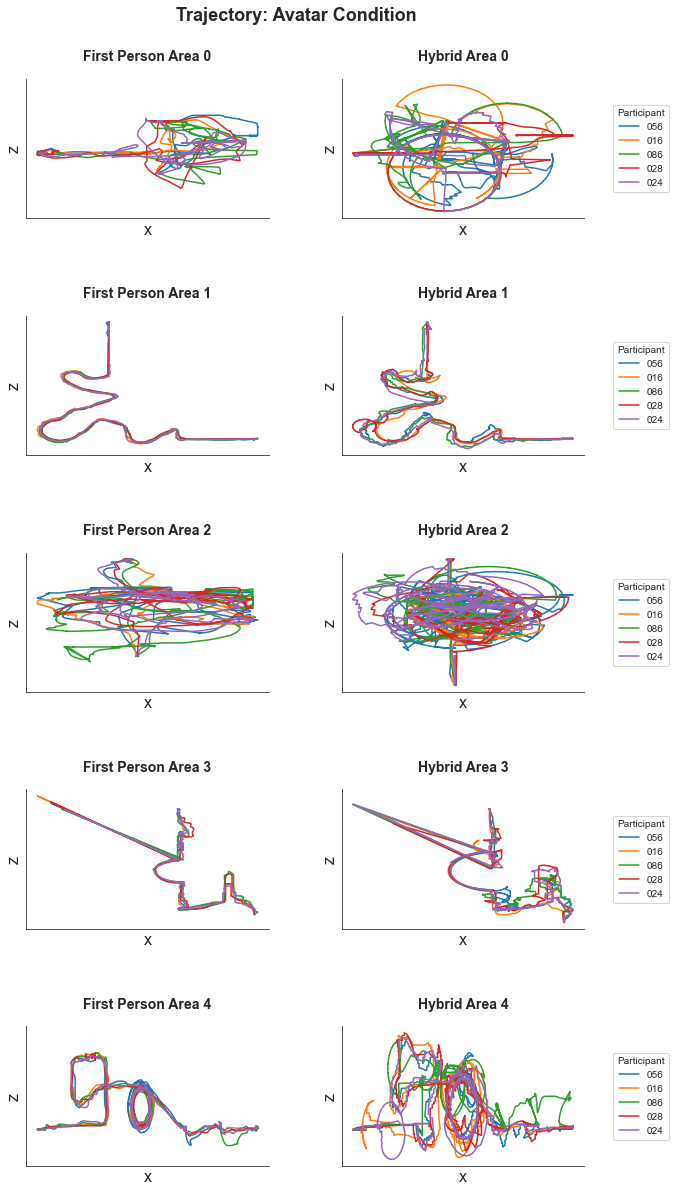

In [16]:
trajectoryPlot(livedata_avatar_fp, livedata_avatar_h, "Avatar", avatarsubjects)

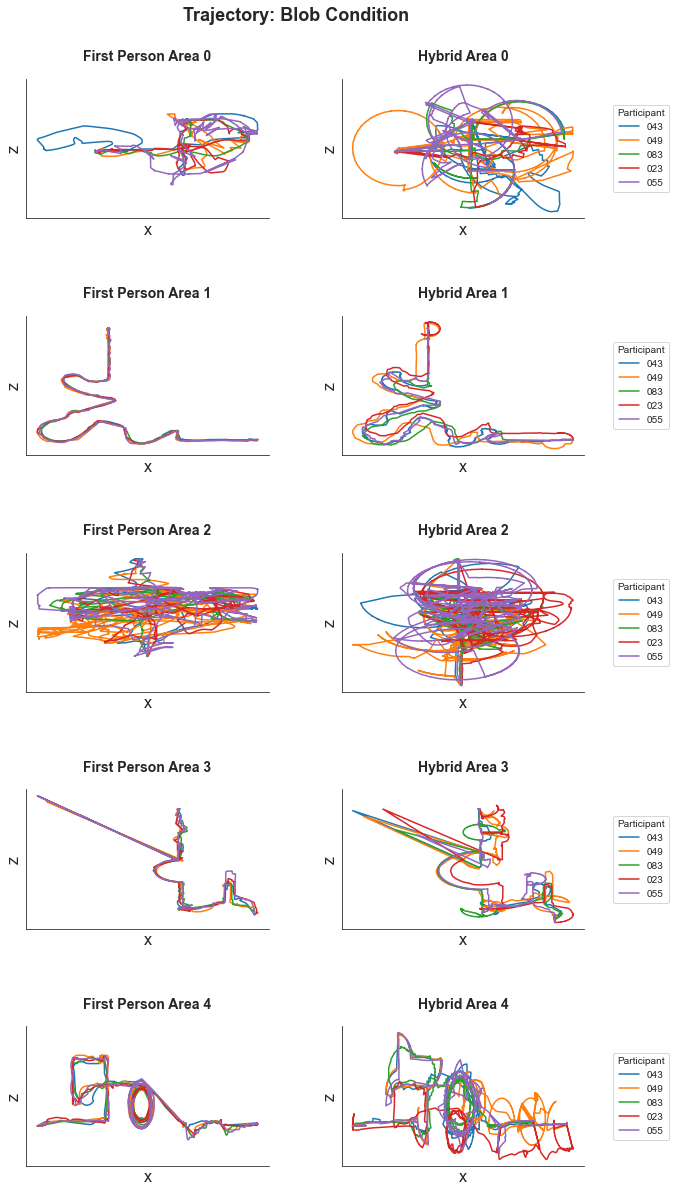

In [17]:
trajectoryPlot(livedata_blob_fp, livedata_blob_h, "Blob", blobsubjects)